In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/commonlitreadabilityprize/sample_submission.csv
/kaggle/input/commonlitreadabilityprize/train.csv
/kaggle/input/commonlitreadabilityprize/test.csv


In [3]:
train = pd.read_csv("/kaggle/input/commonlitreadabilityprize/train.csv")
test = pd.read_csv("/kaggle/input/commonlitreadabilityprize/test.csv")
sample_submission = pd.read_csv("/kaggle/input/commonlitreadabilityprize/test.csv")

In [6]:
train.shape

(2834, 6)

In [7]:
# Check for missing values
print(train.isnull().sum())

id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64


In [9]:
train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


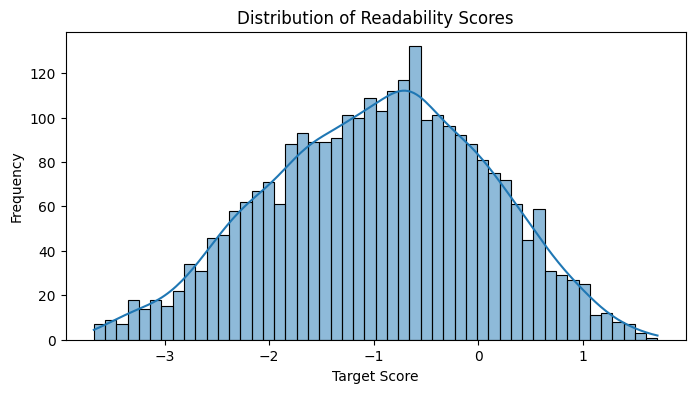

In [14]:
# Plot distribution of target
plt.figure(figsize=(8, 4))
sns.histplot(train['target'], bins=50, kde=True)
plt.title('Distribution of Readability Scores')
plt.xlabel('Target Score')
plt.ylabel('Frequency')
plt.show()

In [15]:
!pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.2 MB/s eta 0:00:00:00:0100:01


In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sentence_transformers import SentenceTransformer

2025-06-19 13:58:01.951936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750341482.207287      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750341482.279123      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
class BertEmbedder(BaseEstimator, TransformerMixin):
    def __init__(self, model_name='all-MiniLM-L6-v2'):
        self.model_name = model_name
        self.model = SentenceTransformer(model_name)

    def fit(self, X, y=None):
        return self  # no fitting needed

    def transform(self, X):
        return self.model.encode(X.tolist(), show_progress_bar=False)

In [18]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [19]:
# Define the pipeline
bert_ridge_pipeline = Pipeline([
    ('embedder', BertEmbedder(model_name='all-MiniLM-L6-v2')),
    ('regressor', Ridge(alpha=1.0))
])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [20]:
# Split the data
from sklearn.model_selection import train_test_split

In [21]:
X = train['excerpt']
y = train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Fit the pipeline
bert_ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('embedder', BertEmbedder()), ('regressor', Ridge())])

In [23]:
# Predict
val_preds = bert_ridge_pipeline.predict(X_val)

In [29]:
# Evaluate
from sklearn.metrics import mean_squared_error

In [30]:
rmse = mean_squared_error(y_val, val_preds, squared=False)
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 0.6327


In [32]:
test_preds = bert_ridge_pipeline.predict(test['excerpt'])
sample_submission['target'] = test_preds
sample_submission.to_csv("submission_bert_ridge.csv", index=False)

In [37]:
sample_submission[5:10]

,id,url_legal,license,excerpt,target
5,12537fe78,NaN,NaN,"To explain transitivity, let us look first at ...",-1.337087
6,965e592c0,https://www.africanstorybook.org/#,CC BY 4.0,Milka and John are playing in the garden. Her ...,0.834299


In [38]:
val_preds = bert_ridge_pipeline.predict(X_val)

# Combine with actual validation texts
val_df = pd.DataFrame({
    'excerpt': X_val,
    'true_score': y_val,
    'predicted_score': val_preds
})


In [39]:
# Top 10 easiest
val_df.sort_values(by='predicted_score').head(10)

,excerpt,true_score,predicted_score
1727,When it becomes a question of practical lighti...,-2.050123,-3.023329
1622,The soil most suitable for the full developmen...,-3.531687,-3.000127
1642,We have frequent inquiries as to the best mean...,-3.585369,-2.931244
1790,The same Captain of Engineers has undertaken a...,-3.038175,-2.914570
1355,My Lords: The time has come for combined effor...,-2.282977,-2.850549
1765,When it is desired to place one of the telesco...,-2.328170,-2.744351
2110,Leaving our trap at Briancon and making a hast...,-3.041762,-2.709844
152,The misgivings of the Classics were justified....,-2.188915,-2.654421
2750,"In 1832 Dr. James Mease, of Philadelphia publi...",-2.758743,-2.652764
2157,"In addition to his other vocations, he was the...",-2.822006,-2.597801


In [40]:
# Top 10 hardest
val_df.sort_values(by='predicted_score', ascending=False).head(10)

,excerpt,true_score,predicted_score
929,"Ape meets Crocodile by the lake. ""Where do you...",0.008823,0.987674
2392,"You have already met Theodore, or Teddy or Ted...",-0.763638,0.839489
927,Maria wants to climb the coconut tree. Naomi d...,0.593029,0.793060
1010,"One day his mother asked him, ""Where do you le...",0.273023,0.784554
1532,A little pine tree was in the woods.\nIt had n...,0.566480,0.781024
1027,"One day, all the wild animals got together to ...",0.048206,0.742861
1988,"He heard his mother calling him, but took no n...",1.008283,0.685039
964,"Once upon a time, there was a goat called Igod...",-0.531588,0.660979
2685,One day there was a boy who came to visit the ...,0.035570,0.655262
387,"If you snorkel or dive in the Red Sea, you wil...",0.766251,0.604838
